In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')
params = {'figure.figsize' : (14,7),
          #'text.usetex'    : True,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20,
          'axes.labelsize' : 24,
          'axes.titlesize' : 24,
          'legend.fontsize': 24,
          'lines.linewidth': 3,
          'lines.markersize': 10,
          'grid.color'     : 'darkgray',
          'grid.linewidth' : 0.5,
          'grid.linestyle' : '--',
          'font.family': 'DejaVu Serif',
         }
plt.rcParams.update(params)

In [2]:
def buildMatrix(N):
    #matriz de ceros
    A= np.zeros((N,N))
    
    #primer renglon
    A[0,0]= 2
    A[0,1]= -1
    
    #renglones interiores
    for i in range(1,N-1):
        A[i,i]=2
        A[i,i+1]= -1
        A[i,i-1]= -1
    
    #ultimo renglon
    A[N-1,N-2]= -1
    A[N-1,N-1]= 2
    
    return A

In [3]:
#parametros fisicos
L=1.0
TA= 1
TB= 0
k=1.0
S= 10.0

#parametros numericos
N=4
h= L/ (N+1)
r= k/  h**2


[[ 2. -1.  0.  0.]
 [-1.  2. -1.  0.]
 [ 0. -1.  2. -1.]
 [ 0.  0. -1.  2.]]
[1.  1.6 1.8 1.6 1.  0. ]


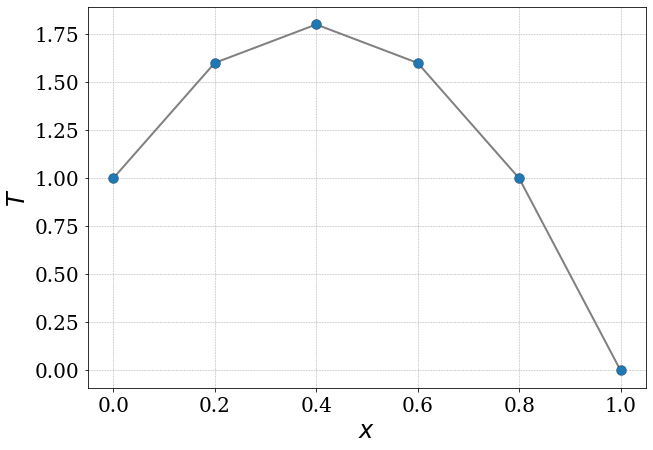

In [4]:
#arreglo para almacenar la solucion
T= np.zeros(N+2)#creanod un arreglo T de tamaño N+2
T[0]= TA #frontera izq
T[-1]= TB #frontera derecha

#lado derecho del sistema
b= np.zeros(N)
b[:]= S/r #fuente o sumidero
b[0] += T[0] #condicion de frontera
b[-1] += T[-1] #condicon de frontera

#construccion d la  matrix
A= buildMatrix(N)

#solucion del sistema lineal
T[1:N+1]= np.linalg.solve(A,b)

#impresion

print(A)
print(T)

x = np . linspace (0 , L , N +2)
plt . figure ( figsize =(10 ,7))
plt . plot (x , T , c=  'grey' , lw =2.0)
plt . scatter (x , T , edgecolor = 'k', zorder = 10)
plt . xlabel ( '$x$')
plt . ylabel ('$T$')
plt . grid ()
plt . show ()


In [5]:
def solExact(x, TA, TB, k, L, S):
    
    return ((TB-TA)/L + (S/(2*k))*(L-x))*x+TA

In [6]:
#Calculo de la solucion numérica: 

def solNum (L, N, k, S, A, b, T, etiqueta):
    h= L/(N+1)
    r= k/ h**2
    
    #lado derecho del sistema
    b= np.zeros(N)
    b[:] = S/r #Fuente o sumidero 
    b[0] += T[0] #condicion de frontera
    b[-1] += T[-1] #condicon de frontera
    
    #solucion del sistema lineal
    T[1:N+1]= np.linalg.solve(A,b)
    
    #Impresión y grafica de la solución
    x= np.linspace(0,L,N+2)
    
    #Construcción de la etiqueta de cada grafica 
    if etiqueta =='L':
        etiqueta = 'L= {:3.2f}'.format(L)
    elif etiqueta == 'k':
        etiqueta = 'k= {:3.2f}'.format(k)
    elif etiqueta== 'S':
        etiqueta = 'S= {:3.2f}'.format(S)
        
    #se grafican los puntos de la solucion 
    plt.scatter(x, T, edgecolor= 'k', s=50, zorder=10, label=etiqueta)
    
    

In [7]:
#funcion para la graficación

def plotSol (title):
    plt.suptitle ("Conducción estacionaria", fontsize =24 , y =0.94 , va="center_baseline")
    plt.title (title , fontsize =20 , color ='b')
    plt.ylabel ('T')
    plt.xlabel ('x')
    plt.legend (loc='center left', bbox_to_anchor =[1 , 0.5] , fontsize =12)
    plt.grid ()
    #plt.savefig (filename)#almacena la fig en un archivo
    plt.show ()

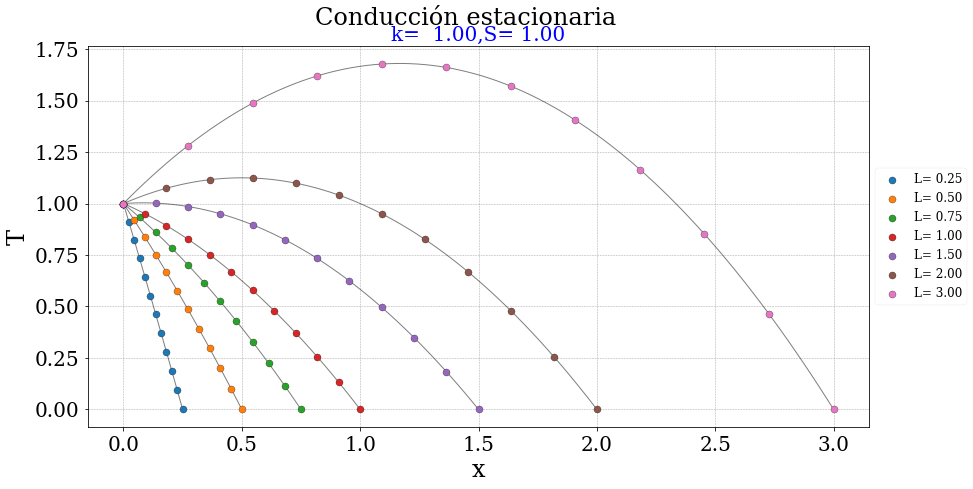

In [10]:
# #Parametros f´sicos
l= [0.25, 0.5, 0.75,1.0,1.5,2.0,3.0]
TA= 1.0
TB= 0.0
k= 1 #conductiviad termica
S= 1#las fronteras no cambian y el factor s cambiara desde el nodo 1 al 4

#parametros numericos
N= 10

#Arreglo para almacenar la solucion
T= np.zeros(N+2)
T[0]= TA #frontera izquierda
T[-1]= TB #frontera derecha

#Construcción de la matriz
A= buildMatrix(N)

for L in l:
    solNum(L,N,k,S,A,b,T,'L')
    xe= np.linspace(0,L,100)
    plt.plot(xe, solExact(xe, TA,TB,k,L,S),'k-',lw=1.0, alpha=0.5)

plotSol('k= {: 3.2f}'.format(k)+ ',S= {:3.2f}'.format(S))

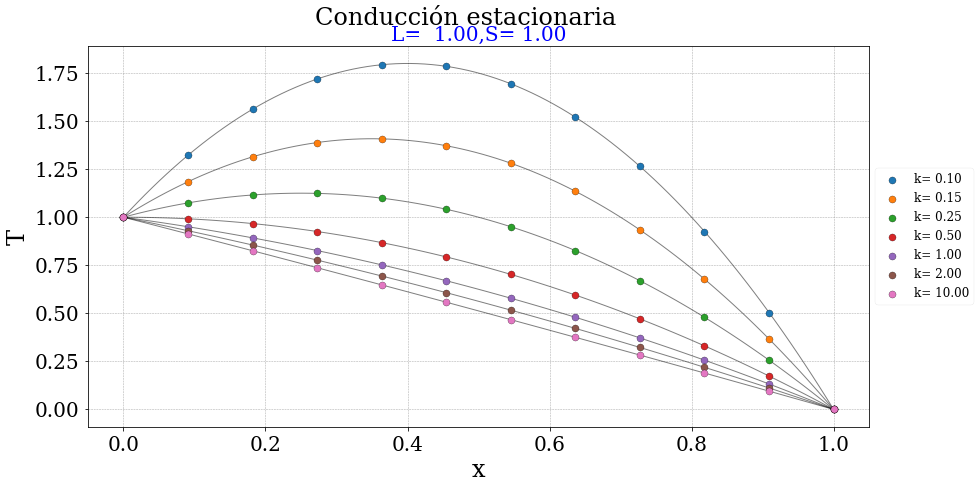

In [9]:
# #Parametros f´sicos
# l= 1 #[0.25, 0.5, 0.75,1.0,1.5,2.0,3.0]
# TA= 1.0
# TB= 0.0
# k= [0.1,0.15,0.25,0.5,1.0,2.0,10] #conductiviad termica
# S= 1#las fronteras no cambian y el factor s cambiara desde el nodo 1 al 4

# #parametros numericos
# N= 10

# #Arreglo para almacenar la solucion
# T= np.zeros(N+2)
# T[0]= TA #frontera izquierda
# T[-1]= TB #frontera derecha

# #Construcción de la matriz
# A= buildMatrix(N)

# for K in k:
#     solNum(l,N,K,S,A,b,T,'k')
#     xe= np.linspace(0,L,100)
#     plt.plot(xe, solExact(xe, TA,TB,K,l,S),'k-',lw=1.0, alpha=0.5)

# plotSol('L= {: 3.2f}'.format(L)+ ',S= {:3.2f}'.format(S))